Mod 3 -- prediction

In this module we are going to learn how to perform prediction using correlared data series



Here, we are importing files from sources.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

typ = int(input("Please enter a number for the file type you would like to upload (1).xlsx (2).csv:\n"))

if typ != 1 and typ != 2:
  print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

else:
  loc = int(input("Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:\n"))
  
  print('NOTE: For the following data, be sure a date column exists for each.')

  if loc != 1 and loc != 2:
    print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

  else:
    if loc == 1: # Google Drive
      
      print("Click on the link to get authentication to allow Google to access your Drive. You should see a screen with\n“Google Cloud SDK wants to access your Google Account” at the top. After you allow permission,\ncopy the given verification code and paste it in the box in Colab.")
      from google.colab import drive
      drive.mount('/content/drive')
      print()

      if typ == 1: # .xlsx
        FileName = input("Please copy the path of your .xlsx file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
        print("\nLoading data...\n")

        dataFrame = pd.ExcelFile(FileName)
        print(dataFrame.sheet_names)

        xl1 = input("Please type the exact first sheet name you would like to use data from \n(please use the data with lower time resolution compared to other data if available):\n")
        xl2 = input("Please type the exact second sheet name you would like to use data from:\n")
    
        dataFrame1 = dataFrame.parse(xl1)
        dataFrame2 = dataFrame.parse(xl2)
        
      elif typ == 2: # .csv
        FileName1 = input("please copy the path of your first .csv file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. \n(please use the data with lower time resolution compared to other data if available) ")
        FileName2 = input("please copy the path of your second .csv file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")

        dataFrame1 = pd.read_csv(FileName1)
        dataFrame2 = pd.read_csv(FileName2)
    
        xl1 = input("Please input a name to represent the data from your first .csv file \n(please use the data with lower time resolution compared to other data if available): ")
        xl2 = input("Please input a name to represent the data from your second .csv file: ")

    elif loc == 2: # Local drive
      from google.colab import files
      import io
    
      if typ == 1: # .xlsx
        uploaded = list(files.upload().values())[0]
        dataFrame = pd.ExcelFile(io.BytesIO(uploaded))
        print(dataFrame.sheet_names)
        
        xl1 = input("Please type the exact first sheet name you would like to use data from \n(please use the data with lower time resolution compared to other data if available):\n")
        xl2 = input("Please type the exact second sheet name you would like to use data from:\n")
    
        dataFrame1 = dataFrame.parse(xl1)
        dataFrame2 = dataFrame.parse(xl2)

      elif typ == 2: # .csv
        print('Please select the first .csv file to download\n(please use the data with lower time resolution compared to other data if available) (note: any files after the first will be ignored):')
        uploaded1 = list(files.upload().values())[0]
        print('Please select the second .csv file to download:')
        uploaded2= list(files.upload().values())[0]
        
        dataFrame1 = pd.read_csv(io.BytesIO(uploaded1))
        dataFrame2 = pd.read_csv(io.BytesIO(uploaded2))
    
        xl1 = input("Please input a name to represent the data from your first .csv file \n(please use the data with lower time resolution compared to other data if available): ")
        xl2 = input("Please input a name to represent the data from your second .csv file: ")  




Please enter a number for the file type you would like to upload (1).xlsx (2).csv:
1
Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:
2
NOTE: For the following data, be sure a date column exists for each.


Saving data_extractV4_6jun2020.xlsx to data_extractV4_6jun2020 (1).xlsx
['Fitbit_Heart_Rate', 'Fitbit_Body_Fat', 'Fitbit_Body_Weight', 'Fitbit_Calories_IntraDay', 'Fitbit_Sleep', 'Fitbit_Distance_IntraDay', 'Fitbit_Steps_IntraDay']
Please type the exact first sheet name you would like to use data from 
(please use the data with lower time resolution compared to other data if available):
Fitbit_Heart_Rate
Please type the exact second sheet name you would like to use data from:
Fitbit_Steps_IntraDay


We can also use data series which are not synchronized in this module unlike mod2.

That is why we are going to need three different columns from each data series: date, time, value.



In [ ]:
print()
print(xl1,": ",dataFrame1.columns)

print()
print(xl2,": ",dataFrame2.columns)

plot1a = input("Enter date option from "+xl1+": ")
plot1b = input("Enter date option from "+xl2+":")
plot2a = input("please enter time option from "+xl1+":")
plot2b = input("please enter time option from "+xl2+":")
plot3a = input("please enter value option from "+xl1+" you want prediction for: ")
plot3b = input("please enter value time option from "+xl2+" you want prediction for: ")


Fitbit_Heart_Rate :  Index(['Unnamed: 0', 'time', 'value', 'date'], dtype='object')

Fitbit_Steps_IntraDay :  Index(['Unnamed: 0', 'time', 'value', 'date'], dtype='object')
Enter date option from Fitbit_Heart_Rate: date
Enter date option from Fitbit_Steps_IntraDay:date
please enter time option from Fitbit_Heart_Rate:time
please enter time option from Fitbit_Steps_IntraDay:time
please enter value option from Fitbit_Heart_Rate you want prediction for: value
please enter value time option from Fitbit_Steps_IntraDay you want prediction for: value


In [ ]:
print(dataFrame1,dataFrame2)

        Unnamed: 0      time  value       date
0                0  23:29:20     70 2020-05-06
1                1  23:29:35     70 2020-05-06
2                2  23:29:58     70 2020-05-06
3                3  23:30:03     69 2020-05-06
4                4  23:30:08     76 2020-05-06
...            ...       ...    ...        ...
215203        9026  21:16:49     67 2020-05-29
215204        9027  21:16:54     68 2020-05-29
215205        9028  21:17:09     68 2020-05-29
215206        9029  21:17:14     68 2020-05-29
215207        9030  21:17:19     68 2020-05-29

[215208 rows x 4 columns]        Unnamed: 0      time  value       date
0               0  00:00:00      0 2020-05-01
1               1  00:01:00      0 2020-05-01
2               2  00:02:00      0 2020-05-01
3               3  00:03:00      0 2020-05-01
4               4  00:04:00      0 2020-05-01
...           ...       ...    ...        ...
44635        1435  23:55:00      0 2020-05-31
44636        1436  23:56:00      0 2020-0

Here, We are going to perform synchronization task.

we are using datetime library to convert string into datetime object.

now we are setting every seconds to 00 for every time value, means converting into minute.

That way, we are gettig values for minutes, now we can take average of values for same time value.

after that, we are setting a new array with those values and generating an updated dataframe.


In [ ]:
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
import time

start = time.time()

timePeriod1 = input("please input from what time period you want to start comparing data from, format = YEAR(0000)-MONTH(00)-DAY(00)' : ")
timePeriod2 = input("please input from what time period you want to start comparing data from,format = YEAR(0000)-MONTH(00)-DAY(00)' : ")


value1 = xl1+" "+plot3a
value2 = xl2+" "+plot3b


#converting string into datetime object
startTime1 = datetime.strptime(timePeriod1, '%Y-%m-%d')
endTime1 = datetime.strptime(timePeriod2, '%Y-%m-%d')

#generating a range of dates
allDates = pd.date_range(start=startTime1, end = endTime1)
print(allDates)

final_df = []


#loop to go through each date in range
for oneDate in allDates:
  df = pd.DataFrame(columns=(plot3a, plot2a, plot1a))

  #getting values for a particular date
  df1 = dataFrame1[dataFrame1[plot1a] == oneDate]
  df2 = dataFrame2[dataFrame2[plot1b] == oneDate] 
  
  #loop to perform sync task
  for p1 in range(len(df1)):
    
    
    oneTime1 = datetime.strptime(df1.iloc[p1][plot2a], '%H:%M:%S').time()
    oneTime1 = oneTime1.replace(second=0, microsecond=0)
    oneTime1 = oneTime1.strftime('%H:%M:%S')
    
    #setting up new dataframe to fill new values
    df.loc[p1,plot2a] = oneTime1
    df.loc[p1,plot1a] = df1.iloc[p1][plot1a]
    df.loc[p1,plot3a] = df1.iloc[p1][plot3a] 
    p2 = p1 + 1

    if(p2 < len(df1)):
      oneTime2 = datetime.strptime(df1.iloc[p2][plot2a], '%H:%M:%S').time()
      oneTime2 = oneTime2.replace(second=0, microsecond=0)
      oneTime2 = oneTime2.strftime('%H:%M:%S')
      df.loc[p2,plot2a] = oneTime2
      df.loc[p2,plot1a] = df1.iloc[p2][plot1a]
      df.loc[p2,plot3a] = df1.iloc[p2][plot3a]
      
      if (oneTime1 == oneTime2):
        p2 = p2+1
      else:
       
        df1a = df[df[plot2a] == oneTime1]
        
        mean1 = df1a[plot3a].mean()

        df2b = df2[df2[plot2b] == oneTime1]
        
        final_df.append([mean1,df2b.iloc[0][plot3b],oneTime1,oneDate])
        
        print(oneDate," , ",oneTime1 )
        p1 = p2

end = time.time()
print((end - start)/60, " Minutes")


Streaming output truncated to the last 5000 lines.
2020-05-25 00:00:00  ,  21:27:00
2020-05-25 00:00:00  ,  21:28:00
2020-05-25 00:00:00  ,  21:29:00
2020-05-25 00:00:00  ,  21:30:00
2020-05-25 00:00:00  ,  21:31:00
2020-05-25 00:00:00  ,  21:32:00
2020-05-25 00:00:00  ,  21:33:00
2020-05-25 00:00:00  ,  21:34:00
2020-05-25 00:00:00  ,  21:35:00
2020-05-25 00:00:00  ,  21:36:00
2020-05-25 00:00:00  ,  21:37:00
2020-05-25 00:00:00  ,  21:38:00
2020-05-25 00:00:00  ,  21:39:00
2020-05-25 00:00:00  ,  21:40:00
2020-05-25 00:00:00  ,  21:41:00
2020-05-25 00:00:00  ,  21:42:00
2020-05-25 00:00:00  ,  21:43:00
2020-05-25 00:00:00  ,  21:44:00
2020-05-25 00:00:00  ,  21:45:00
2020-05-25 00:00:00  ,  21:46:00
2020-05-25 00:00:00  ,  21:47:00
2020-05-25 00:00:00  ,  21:48:00
2020-05-25 00:00:00  ,  21:49:00
2020-05-25 00:00:00  ,  21:50:00
2020-05-25 00:00:00  ,  21:51:00
2020-05-25 00:00:00  ,  21:52:00
2020-05-25 00:00:00  ,  21:53:00
2020-05-25 00:00:00  ,  21:54:00
2020-05-25 00:00:00  ,  2

In [ ]:

#after receiving synchronized data, generating a new updated dataframe
final_df = pd.DataFrame(final_df,columns=[value1,value2,plot2a,plot1a])
print(final_df)


       Fitbit_Heart_Rate value  ...       date
0                    70.000000  ... 2020-05-06
1                    72.000000  ... 2020-05-06
2                    68.222222  ... 2020-05-06
3                    66.555556  ... 2020-05-06
4                    64.142857  ... 2020-05-06
...                        ...  ...        ...
29855                69.875000  ... 2020-05-29
29856                68.428571  ... 2020-05-29
29857                66.428571  ... 2020-05-29
29858                66.400000  ... 2020-05-29
29859                67.500000  ... 2020-05-29

[29860 rows x 4 columns]


From this part we are strating our prediction problem.

user can choose which data he/she wants to predict.

In [ ]:
dataP = int(input("please state which data series you want to predict(just enter the number): \n(1)"+value1+", (2)"+value2+": "))
if dataP == 2: 
  dataFrame3 = { value1: final_df[value1], value2: final_df[value2]}
  dataFrame3 = pd.DataFrame(dataFrame3)

elif dataP == 1:
  temp = value1
  value1 = value2
  value2 = temp

  dataFrame3 = { value1: final_df[value1], value2: final_df[value2]}
  dataFrame3 = pd.DataFrame(dataFrame3) 

print(dataFrame3)

please state which data series you want to predict(just enter the number): 
(1)Fitbit_Heart_Rate value, (2)Fitbit_Steps_IntraDay value: 1
       Fitbit_Steps_IntraDay value  Fitbit_Heart_Rate value
0                               17                70.000000
1                                0                72.000000
2                                0                68.222222
3                                0                66.555556
4                                0                64.142857
...                            ...                      ...
29855                            0                69.875000
29856                            0                68.428571
29857                            0                66.428571
29858                            0                66.400000
29859                            0                67.500000

[29860 rows x 2 columns]


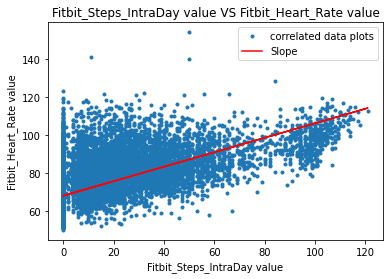

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
from numpy import polyfit
#plotting correlation using raw data
plt.plot(dataFrame3[value1], dataFrame3[value2], '.',zorder=0,label = "correlated data plots")
B1, B0 = np.polyfit(dataFrame3[value1], dataFrame3[value2],1)#B1 = m, B0 = b
#plotting slope 
plt.plot(dataFrame3[value1],B0 +  B1*dataFrame3[value1],'r', label = "Slope")
plt.legend()
plt.title(value1+" VS "+ value2)
plt.xlabel(value1)
plt.ylabel(value2)
plt.figure()
plt.show()

In [ ]:
print("intercept: ",B0)
print("slope: ",B1)

intercept:  68.05005462493993
slope:  0.3809684083557036


Here, we are going to perform linear regression with scikit learn.

scikit learn made it easy to train and perform predicto using linear regression implementation.

In [ ]:
#importing sklearn libraries for training and linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


#setting and preparing data
X = dataFrame3.iloc[:, :-1].values #fisrt column in dataframe
y = dataFrame3.iloc[:, 1].values #second column in dataframe

#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

#training model using LinearRegresion() model of sklearn 
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("intercept: ",regressor.intercept_)


print("slope: ",regressor.coef_)

intercept:  68.05850545369255
slope:  [0.38158841]


In [ ]:

x_test = []
#generating a list of training data value out of 2d array which only has one value in each row
for i in X_test.tolist():
  x_test.append(str(i)[1:-1] )

#predicting values for training and testing 
y_pred0 = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
print("predictions for test dataset: ")
df = pd.DataFrame({value1:x_test ,'Actual '+value2: y_test, 'Predicted': y_pred})
df

predictions for test dataset: 


,Fitbit_Steps_IntraDay value,Actual Fitbit_Heart_Rate value,Predicted
0,0,55.200000,68.058505
1,0,67.500000,68.058505
2,0,71.833333,68.058505
3,0,57.875000,68.058505
4,0,63.000000,68.058505
...,...,...,...
7460,0,59.400000,68.058505
7461,27,76.333333,78.361392
7462,0,78.900000,68.058505
7463,30,94.222222,79.506158


In [ ]:
print("training mean: ",y_train.mean())
print("testing mean: ",y_test.mean())
print()

training mean:  70.62851488926842
testing mean:  70.53248640360161



In [ ]:
#importinf metrics from sklearn to calculate erros
from sklearn import metrics

print('Mean Absolute Error of training results:', metrics.mean_absolute_error(y_train, y_pred0))
print('Mean Squared Error of training results:', metrics.mean_squared_error(y_train, y_pred0))
print('Root Mean Squared Error of training results:', np.sqrt(metrics.mean_squared_error(y_train, y_pred0)))
print()
print('Mean Absolute Error of testing results:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error of testing results:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of testing results:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error of training results: 7.534307864189496
Mean Squared Error of training results: 89.4020884674694
Root Mean Squared Error of training results: 9.455267762864752

Mean Absolute Error of testing results: 7.545942145902822
Mean Squared Error of testing results: 89.62473671029856
Root Mean Squared Error of testing results: 9.467034208784638


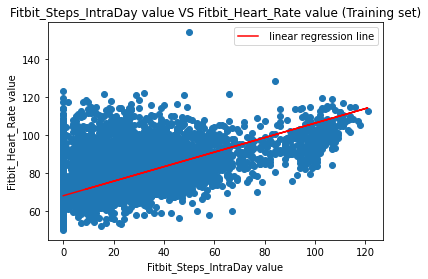

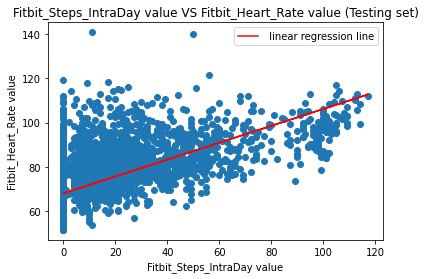

In [ ]:
# Visualizing the Training set results
plt_train = plt
plt_train.scatter(X_train, y_train,zorder = 0)
plt_train.plot(X_train, regressor.predict(X_train), color='red',label = " linear regression line")
plt_train.legend()
plt_train.title(value1+" VS "+ value2+" (Training set)")
plt_train.xlabel(value1)
plt_train.ylabel(value2)
plt_train.show()
print()
# Visualizing the Test set results
plt_test = plt
plt_test.scatter(X_test, y_test,zorder = 0)
plt_test.plot(X_test, regressor.predict(X_test), color='red',label = " linear regression line")
plt_test.legend()
plt_test.title(value1+" VS "+ value2+" (Testing set)")
plt_test.xlabel(value1)
plt_test.ylabel(value2)
plt_test.show()

In [ ]:

#finally, we can predict any value manually


tst = int(input("please enter any "+value1+" to predict "+value2+" :"))

y_pred = regressor.predict(np.array([tst]).reshape(-1, 1))

print(y_pred)

please enter any Fitbit_Steps_IntraDay value to predict Fitbit_Heart_Rate value :33
[80.65092295]
